In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [204]:
path = "C:/Users/johan/Desktop/housing.csv"
df = pd.read_csv(path)

In [119]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


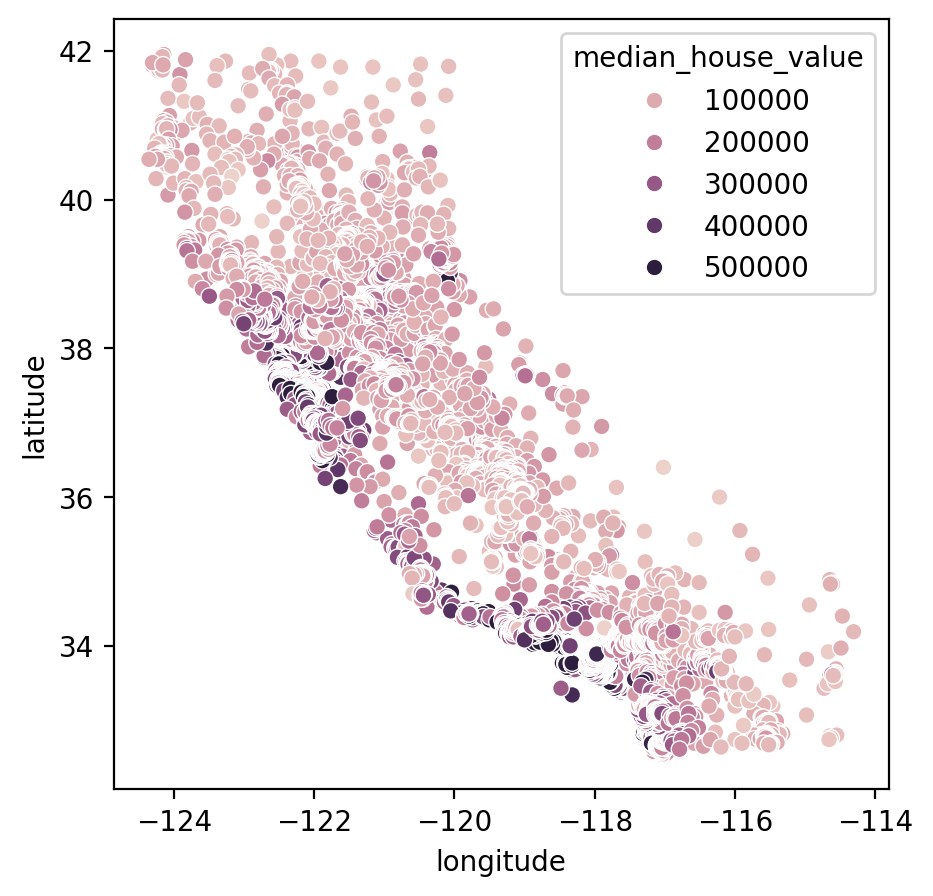

In [121]:
plt.figure(figsize=(5,5), dpi=200)
sns.scatterplot(x=df["longitude"], y=df["latitude"], hue=df["median_house_value"])
plt.show()

<Axes: xlabel='longitude', ylabel='median_house_value'>

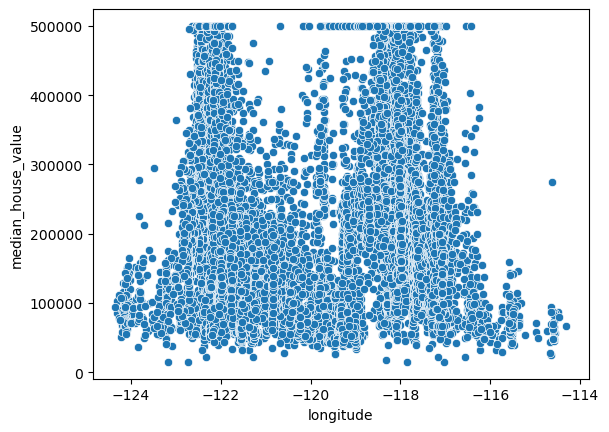

In [122]:
sns.scatterplot(x=df['longitude'], y=df["median_house_value"])

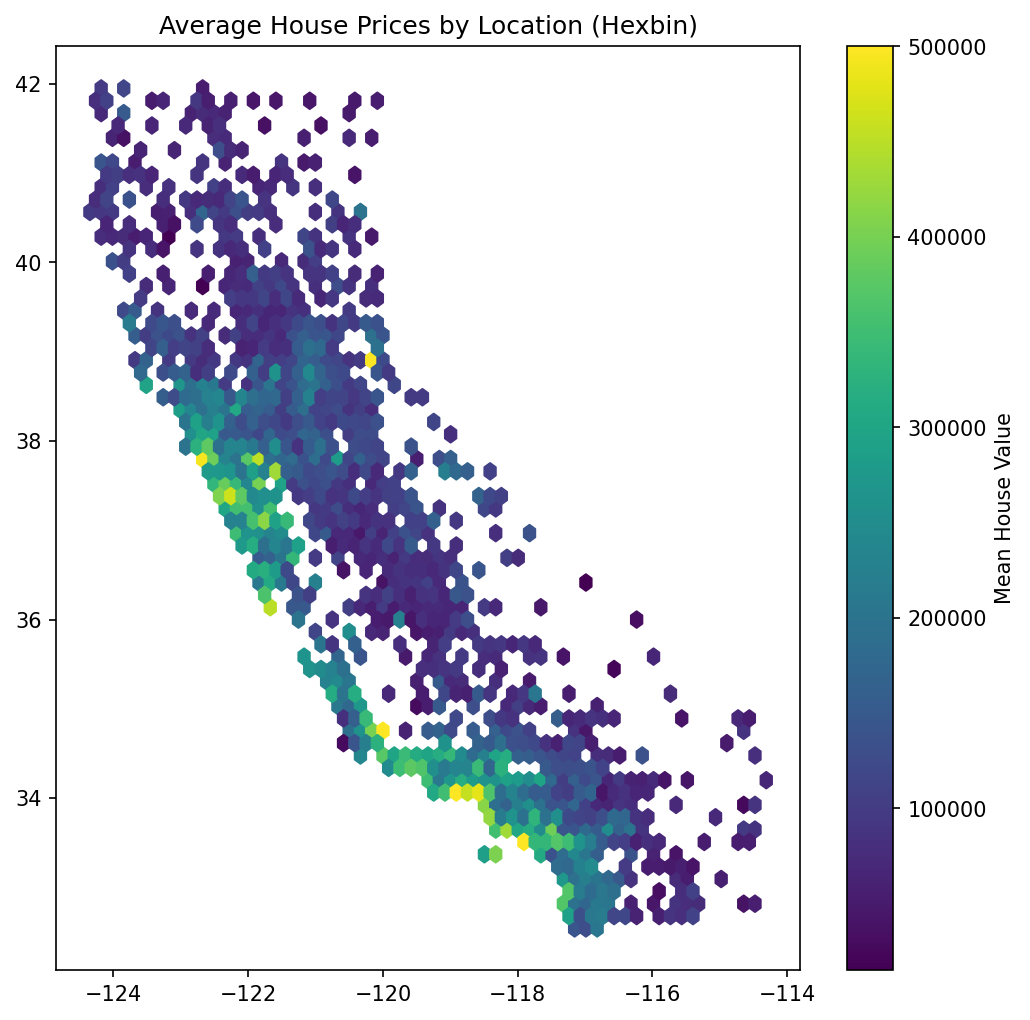

In [123]:


plt.figure(figsize=(8,8), dpi=150)
plt.hexbin(df["longitude"], df["latitude"], C=df["median_house_value"],
           gridsize=60, cmap="viridis", reduce_C_function=np.mean)
plt.colorbar(label="Mean House Value")
plt.title("Average House Prices by Location (Hexbin)")
plt.show()


In [128]:
def assign_region(lat, lon):
    if 33.5 <= lat <= 34.5 and -119 <= lon <= -117.5:
        return "Los Angeles"
    elif 32.5 <= lat <= 33.3 and -117.3 <= lon <= -116.8:
        return "San Diego"
    elif 37.0 <= lat <= 38.5 and -123 <= lon <= -121:
        return "Bay Area"
    else:
        return "Other"

df['region'] = df.apply(lambda row: assign_region(row['latitude'], row['longitude']), axis=1)

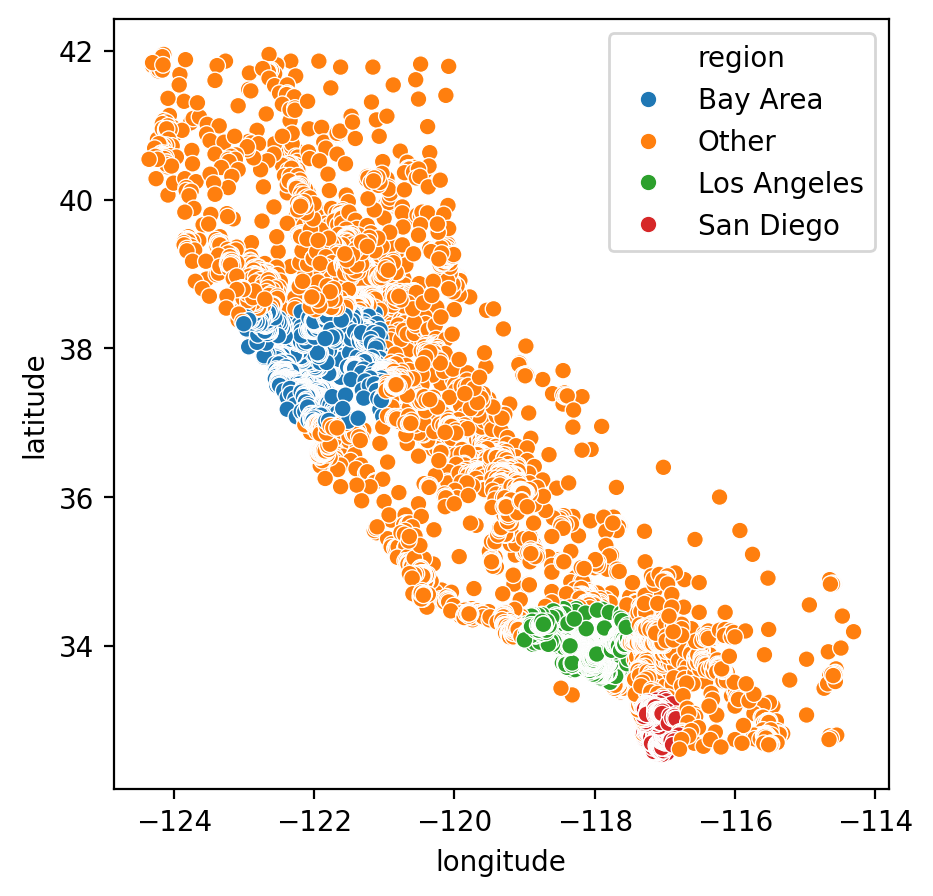

In [130]:
plt.figure(figsize=(5,5), dpi=200)
sns.scatterplot(x=df["longitude"], y=df["latitude"], hue=df["region"])
plt.show()

<Axes: xlabel='region', ylabel='median_house_value'>

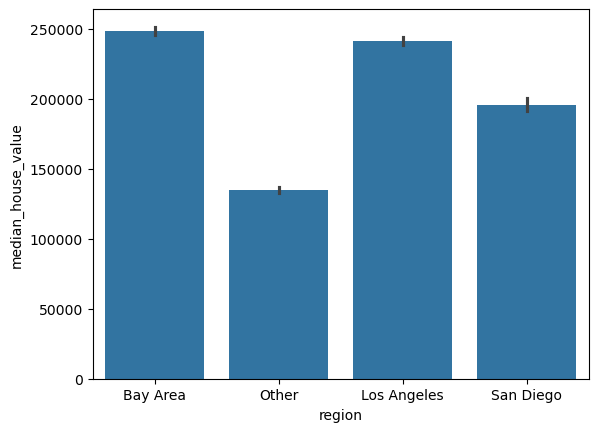

In [131]:
sns.barplot(x=df["region"], y=df["median_house_value"])

<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

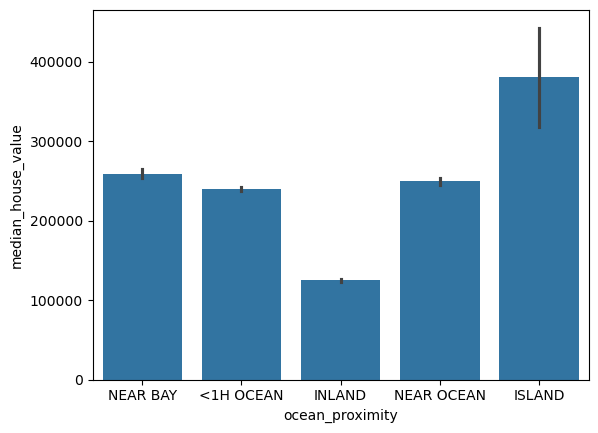

In [134]:
sns.barplot(x=df["ocean_proximity"], y=df["median_house_value"])

In [136]:
df[df['households'] == 0]
df['households'].isna().sum()

0

In [206]:
df["avg_bedroom"] = df["total_bedrooms"] / df["households"]
df["avg_rooms"] = df["total_rooms"] / df["households"]
df["avg_population"] = df["population"] / df["households"]
df["avg_rooms"] = df["avg_rooms"].clip(0,15)
df["avg_bedroom"] = df["avg_bedroom"].clip(0,5)

<Axes: xlabel='avg_bedroom', ylabel='median_house_value'>

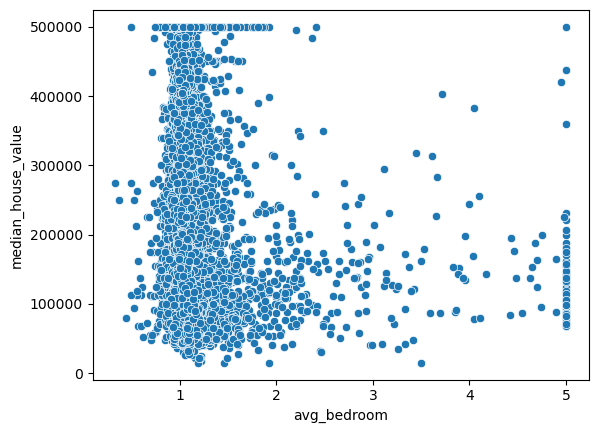

In [140]:
sns.scatterplot(x=df["avg_bedroom"], y=df["median_house_value"])

<Axes: xlabel='avg_rooms', ylabel='median_house_value'>

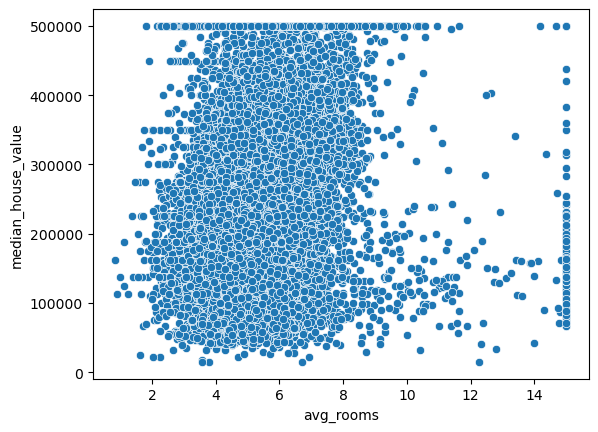

In [142]:
sns.scatterplot(x=df["avg_rooms"], y=df["median_house_value"])

(0.0, 10.0)

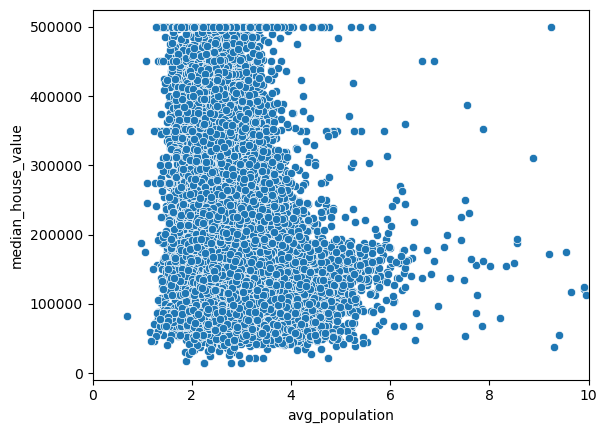

In [144]:
sns.scatterplot(x=df["avg_population"], y=df["median_house_value"])
plt.xlim(0, 10)   

In [208]:
df["density"] = df["avg_population"] / df["avg_rooms"]
df["density"] = df["density"].clip(0, 5)

(0.0, 5.1)

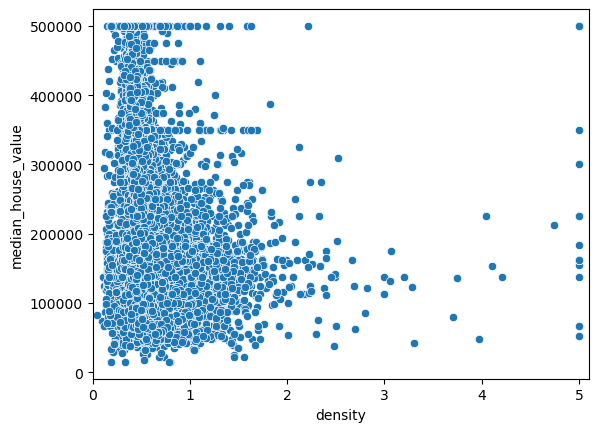

In [148]:
sns.scatterplot(x=df["density"], y=df["median_house_value"])
plt.xlim(0, 5.1) 

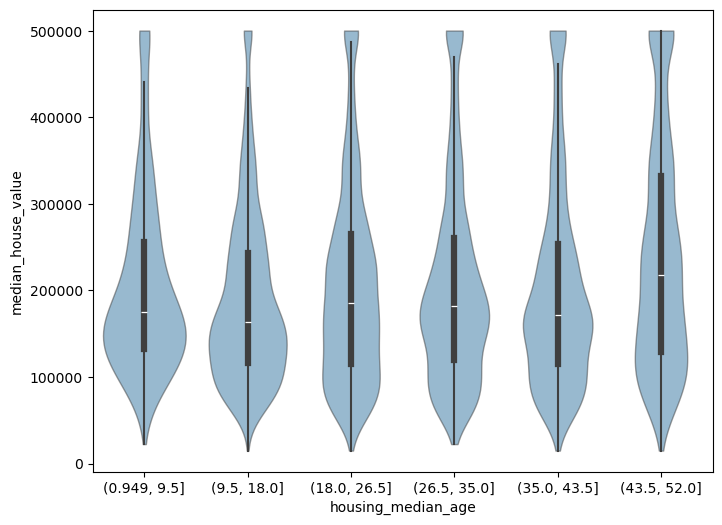

In [150]:
plt.figure(figsize=(8,6))
sns.violinplot(
    x=pd.cut(df["housing_median_age"], bins=6),
    y="median_house_value",
    data=df,
    inner="box",       # adds a boxplot inside
    linewidth=1,       # thinner outline
    cut=0,             # don’t extend tails beyond data
    alpha=0.5          # make it semi-transparent
)
plt.show()

In [152]:
def assign_type(density):
    if density < 0.5:
        return "Mansion"
    elif 0.5 < density < 1.5:
        return "S_D_House"
    else: 
        return "Apartament_building"

df['type'] = df.apply(lambda row: assign_type(row['density']), axis=1)

In [154]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'region', 'avg_bedroom',
       'avg_rooms', 'avg_population', 'density', 'type'],
      dtype='object')

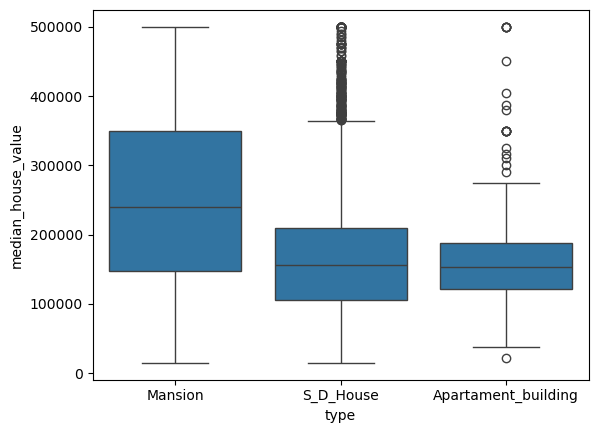

In [156]:
sns.boxplot(x="type", y="median_house_value", data=df)
plt.show()

<Figure size 2400x1500 with 0 Axes>

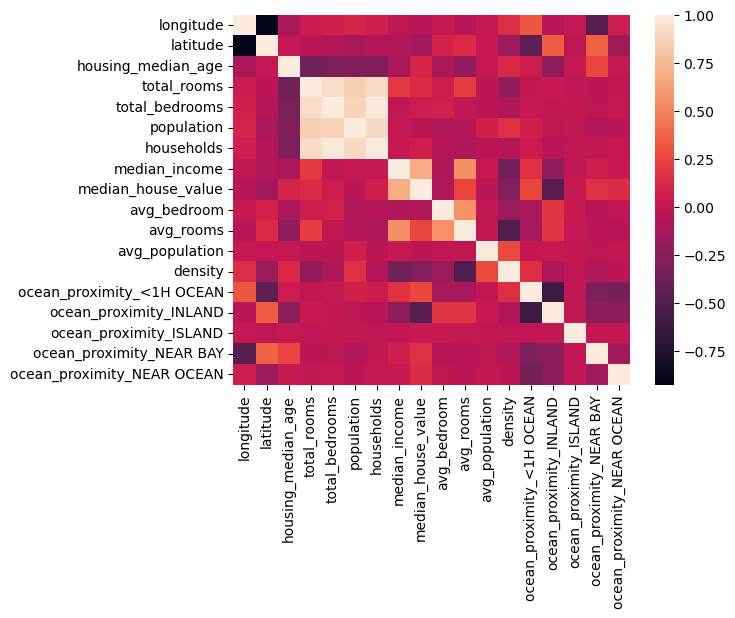

<Figure size 2400x1500 with 0 Axes>

In [210]:
df = pd.get_dummies(df)

sns.heatmap(data = df.corr())

plt.figure(figsize=(8,5), dpi=300)

In [212]:
df  = df.drop(["longitude", "latitude"], axis=1)


In [214]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
df_clean = df.dropna()
df_clean

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,avg_bedroom,avg_rooms,avg_population,density,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,1.023810,6.984127,2.555556,0.365909,False,False,False,True,False
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.971880,6.238137,2.109842,0.338217,False,False,False,True,False
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1.073446,8.288136,2.802260,0.338105,False,False,False,True,False
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1.073059,5.817352,2.547945,0.437991,False,False,False,True,False
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1.081081,6.281853,2.181467,0.347265,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1.133333,5.045455,2.560606,0.507508,False,True,False,False,False
20636,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1.315789,6.114035,3.122807,0.510760,False,True,False,False,False
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1.120092,5.205543,2.325635,0.446761,False,True,False,False,False
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1.171920,5.329513,2.123209,0.398387,False,True,False,False,False


In [216]:
X = df_clean.drop("median_house_value", axis=1)
y = df_clean["median_house_value"]

In [218]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

In [220]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [222]:
from sklearn.metrics import accuracy_score


In [226]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
rmse = mean_squared_error(y_train, y_pred, squared=False)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R^2: {r2:.2f}")

RMSE: 69286.53, MAE: 50002.89, R^2: 0.64


In [228]:
df.columns


Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'median_house_value', 'avg_bedroom',
       'avg_rooms', 'avg_population', 'density', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')